<a href="https://www.kaggle.com/code/danielfourie/ps4e1-bank-churn-eda-feature-engineering-ann?scriptVersionId=206200706" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Filter all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


<center>
    <h1>Playground Series S4E1 - Bank Churn</h1>
    <img src="https://user-images.githubusercontent.com/58620359/174948746-5dc3418a-8296-4cc8-9561-f8f12ca9a0a4.png">
</center>

# <u><b>Data Reading and Cleaning</b></u>

In [2]:
#import dataset
dataset = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")

In [3]:
#Let's look at the top 5 rows
dataset.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


**We have the following feature types:<br>
Categorical: Geography, Gender, Tenure, NumOfProducts, HasCrCard, and IsActiveMember.</br>
Numerical: CreditScore, Age, Balance, and EstimatedSalary.**

In [4]:
#set index using id
dataset = dataset.set_index('id')

In [5]:
#Let's look at the columns and their data type
dataset.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#Change columns to correct dtype
for colName in dataset.columns:
    if colName in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Exited']:
        next
    else:
        dataset[colName] = dataset[colName].astype('category')

dataset.dtypes

CustomerId         category
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited                int64
dtype: object

In [7]:
#We will drop columns that do not add any insight into whether the client exited the bank
dataset.drop(columns=['CustomerId','Surname'],inplace=True)

In [8]:
#Let's see the number of rows we have in our dataset
dataset.shape[0]

165034

In [9]:
#Let's see how many NaN values there are
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**We have no NaN values. This is great! We will move onto some EDA.**

# <u><b>Exploratory Data Analysis (EDA)</b></u>

In [10]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Let's delve into the column CreditScore and see a histogram as well as a box plot of it to understand the distribution.**

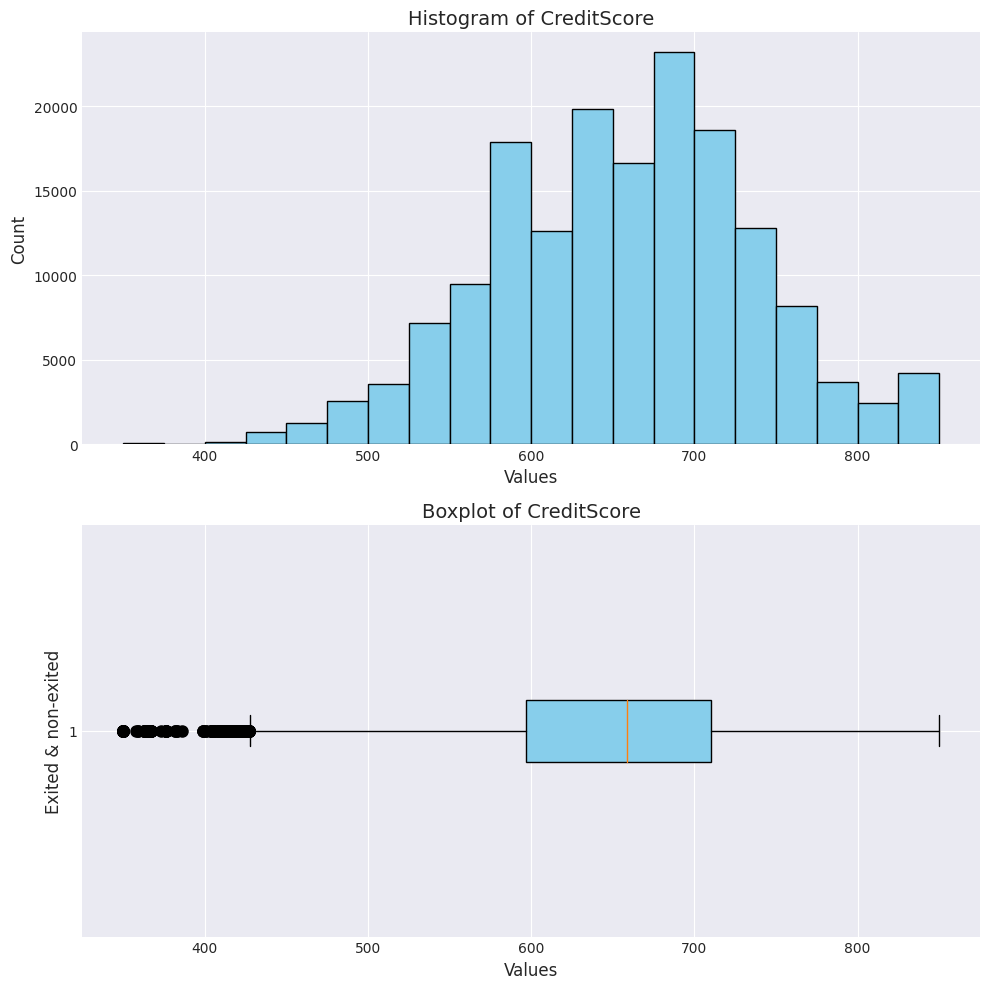

In [11]:
#Plotting the histogram and boxplot of CreditScore
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].hist(dataset['CreditScore'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Values',fontsize=12)
axs[0].set_ylabel('Count',fontsize=12)
axs[0].set_title('Histogram of CreditScore',fontsize=14)
axs[0].grid(True)

bplot = axs[1].boxplot(dataset['CreditScore'], vert=False,patch_artist=True,
                       boxprops=dict(color="black"),whiskerprops=dict(color="black"),
                      flierprops=dict(marker='o', markerfacecolor='black', markersize=8),
                      capprops=dict(color="black"))
for patch, color in zip(bplot['boxes'], ['skyblue']):
        patch.set_facecolor(color)
axs[1].set_xlabel('Values',fontsize=12)
axs[1].set_ylabel('Exited & non-exited',fontsize=12)
axs[1].set_title('Boxplot of CreditScore',fontsize=14)
axs[1].grid(True)
plt.tight_layout()
plt.show()

**We can see that the data from CreditScore is slightly skewed to the left. To further look into this column we will use the describe() method below.**

In [12]:
dataset.CreditScore.describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

**We will now investigate the relationship between the Geography and Exited (our target) columns.**

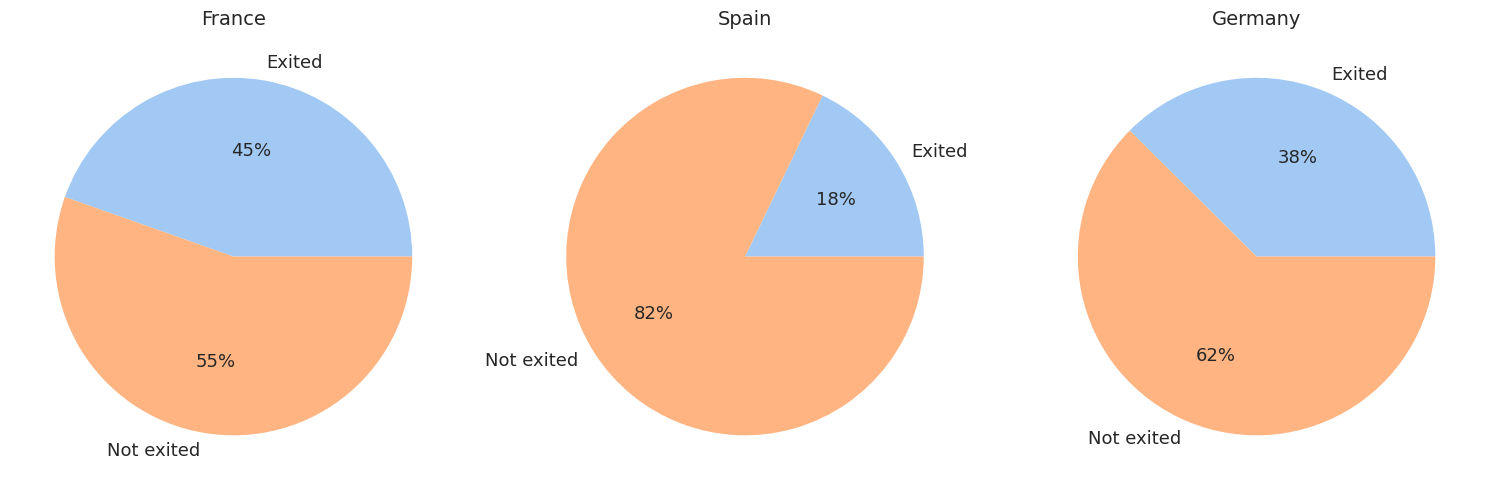

In [13]:
a = dataset.groupby("Geography")["Exited"].sum()/dataset.Exited.sum()*100
#set labels for pie chart
pieChartLabels = ['Exited','Not exited']
#define Seaborn color palette to use
myColours = sns.color_palette('pastel')[0:5]
#define the layout for subplots
fig, axs = plt.subplots(1, len(dataset.Geography.unique()), figsize=(15, 5))
#display pie charts for all countries
for i, country in enumerate(dataset.Geography.unique()):
    sizes = [a[country], 100 - a[country]]
    #create pie chart in respective subplot
    axs[i].pie(sizes, labels=pieChartLabels, colors=myColours, autopct='%.0f%%',textprops={'fontsize': 13})
    axs[i].set_title(f"{country}",fontsize=14)
plt.tight_layout()
plt.show()

**We see that France has the most evenly distributed set of values, while Germany has less customers exiting than France, and Spain is seems to be doing the best job out of the three countries in securing their customers stay.**

**Let's see the distribution of the Age column.**

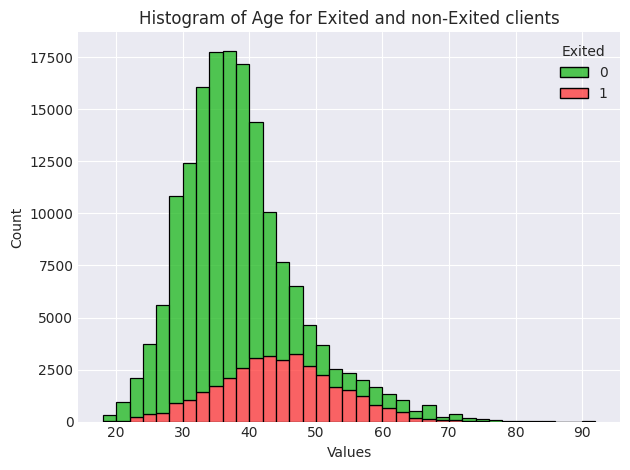

In [14]:
sns.histplot(data=dataset,x='Age',binwidth=2,hue='Exited',multiple='stack',palette=['#1bb81b','#ff3535'])
plt.xlabel("Values")
plt.title('Histogram of Age for Exited and non-Exited clients')
plt.tight_layout()
plt.show()

**We observe that for clients that did Exit the bank, their Age distribution is fairly even, whereas for clients that did not Exit the bank, the Age distribution is skewed to the right (this will be fixed later on by performing a log transformation on this feature).<br>Let's further look into the clients that did not Exit the bank by using a boxplot from their Age.**

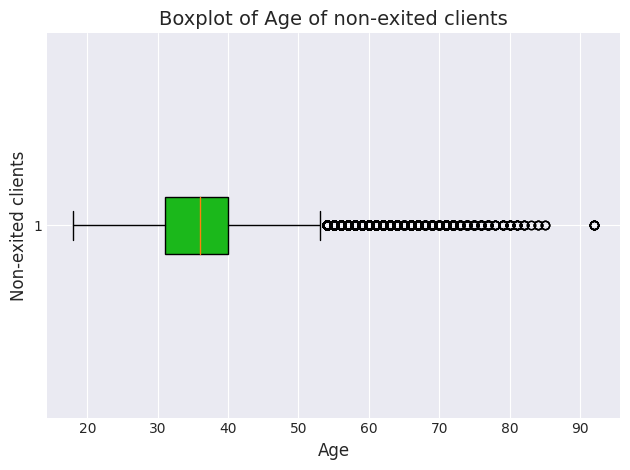

In [15]:
bplot = plt.boxplot(dataset[dataset['Exited']==0]['Age'], vert=False,patch_artist=True)
for patch, color in zip(bplot['boxes'], ['#1bb81b']):
        patch.set_facecolor(color)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Non-exited clients',fontsize=12)
plt.title('Boxplot of Age of non-exited clients',fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

**The IQR range is from 31 years old to 40 years old. We do have some outliers, i.e. clients aged 53 years and more. Let's see the percentage of these Age outliers for non-exited clients.**

In [16]:
perc = dataset[(dataset['Exited']==0) & (dataset['Age']>=53)]['Age'].count()/dataset[dataset['Exited']==0]['Age'].count()*100
print(f"The percentage of outliers in terms of Age for non-exited clients is {perc:.2f}%")

The percentage of outliers in terms of Age for non-exited clients is 4.57%


**We see that we do not have many outliers here. This is good.<br>
We will now look at the distribution of the other two numerical features: Balance, and EstimatedSalary.**

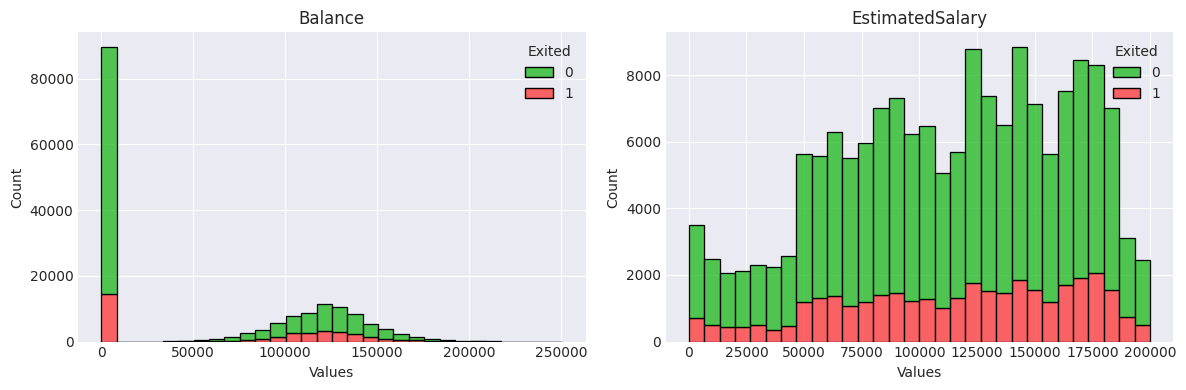

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#Plotting histogram of Balance
sns.histplot(data=dataset, x='Balance', bins=30,ax=axs[0], hue='Exited', multiple='stack', palette=['#1bb81b', '#ff3535'])
axs[0].set_title('Balance')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Count')
axs[0].grid(True)

#Plotting histogram of EstimatedSalary
sns.histplot(data=dataset, x='EstimatedSalary', bins=30,ax=axs[1], hue='Exited', multiple='stack', palette=['#1bb81b', '#ff3535'])
axs[1].set_title('EstimatedSalary')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Count')
axs[1].grid(True)
plt.tight_layout()
plt.show()

**We notice that for Balance, we have a massive peak at the value 0. Otherwise the distribution is normal.<br>For EstimatedSalary we see a mostly uniform distribution. Therefore, we may remove this feature as it likely doesn't contribute meaningfully to our target feature. Removing EstimatedSalary will also reduce complexity for our model that we will later build.**

**Let's see how many unique values each column has.**

In [18]:
for i in dataset.columns:
  print(f'The column "{i}" has {len(dataset[i].value_counts())} unique values.')

The column "CreditScore" has 457 unique values.
The column "Geography" has 3 unique values.
The column "Gender" has 2 unique values.
The column "Age" has 71 unique values.
The column "Tenure" has 11 unique values.
The column "Balance" has 30075 unique values.
The column "NumOfProducts" has 4 unique values.
The column "HasCrCard" has 2 unique values.
The column "IsActiveMember" has 2 unique values.
The column "EstimatedSalary" has 55298 unique values.
The column "Exited" has 2 unique values.


**Let's now check our dataset for multicollinearity. We will use Variance Inflated Factor (VIF), as well as a correlation score for each feature against each other. Note: in order for us to use these methods we need to encode the categorical variables first.**

In [19]:
#create a copy of dataset to use for encoding, VIF, and correlation. 
df = dataset.copy()
#encoding
categoricalFeatures = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
df = pd.get_dummies(data=df,columns=categoricalFeatures,drop_first=True,dtype='int') #drop_first=True to avoid the dummy variable trap
#Removing the target column from df - we will later add it when checking the correlation
transportedColumn = df.pop('Exited')
df.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,...,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0
id,,,,,,,,,,,,,,,,,,,,,
0,668,33.0,0.00,181449.97,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,627,33.0,0.00,49503.50,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,1
2,678,40.0,0.00,184866.69,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,581,34.0,148882.54,84560.88,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,716,33.0,0.00,15068.83,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [20]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Calculate VIF for each df column
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif_data.sort_values(by="VIF",ascending = False)

,Feature,VIF
0,CreditScore,34.408709
1,Age,17.023425
3,EstimatedSalary,5.775654
20,HasCrCard_1.0,3.976737
8,Tenure_2,3.723711
13,Tenure_7,3.677814
10,Tenure_4,3.646841
14,Tenure_8,3.642360
11,Tenure_5,3.605445
7,Tenure_1,3.526914


**We see features CreditCard and Age have high VIF values - this indicates that a linear regression model could not be very stable for this dataset. We will now look into their correlation with the target column as well as with the other features.**

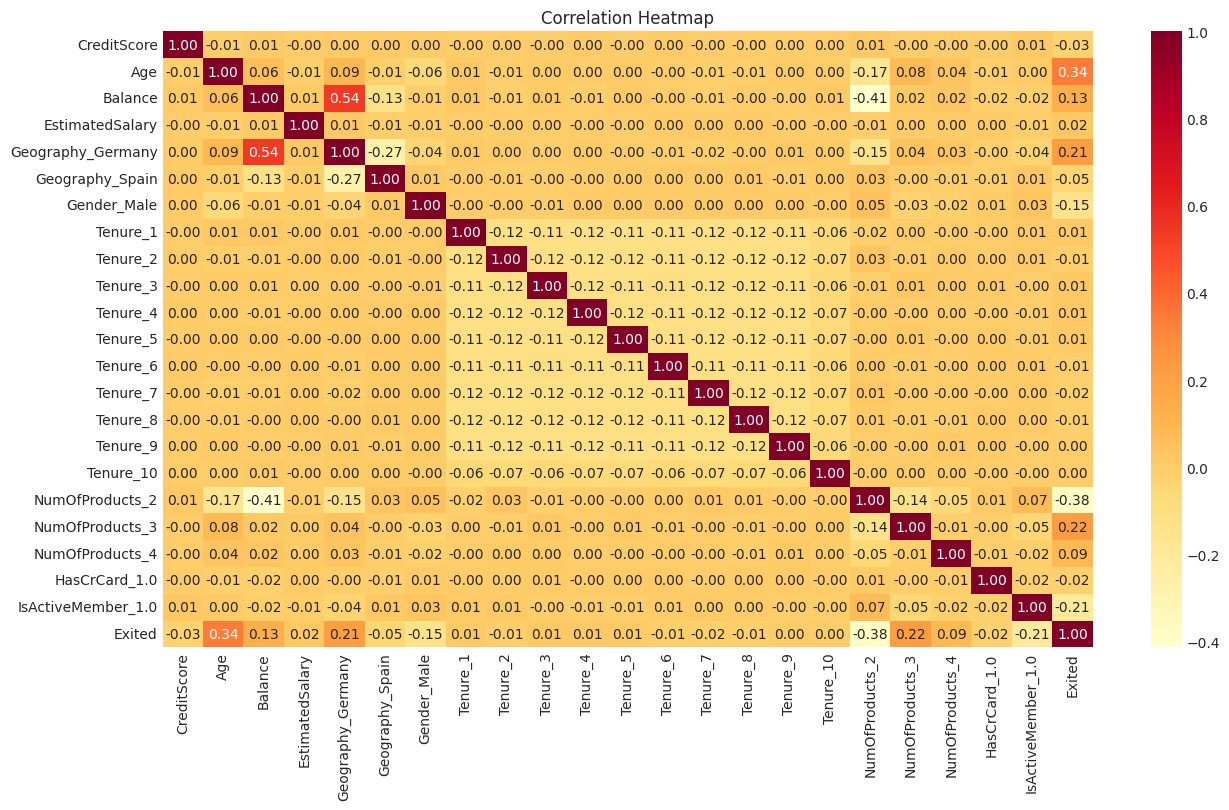

In [21]:
#Let's move the Exited column back to the end of df
df = pd.concat([df,transportedColumn],axis=1)
#correlation
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**We see Age has a correlation value of 0.34 with the target column Exited, while CreditScore has a low correlation value with Exited. Therefore, if we are to remove any of the two features it would be CreditScore. Removing could help with any multicollinearity problems.<br>Let's see how the VIF scores will change after removing CreditScore.**

In [22]:
df.drop(columns=["CreditScore","Exited"],inplace=True)
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif_data.sort_values(by="VIF",ascending = False)

,Feature,VIF
0,Age,13.900456
2,EstimatedSalary,5.547841
19,HasCrCard_1.0,3.888421
1,Balance,2.917457
7,Tenure_2,2.863911
12,Tenure_7,2.821851
13,Tenure_8,2.807952
9,Tenure_4,2.801812
10,Tenure_5,2.789034
6,Tenure_1,2.734128


**We see Age's VIF score has decreased.**

In [23]:
#Lastly, let's see the distribution of our Exited column.
print(f"Distribution of Exited column: {dataset['Exited'].sum()/dataset.shape[0]*100:.2f}%")

Distribution of Exited column: 21.16%


**Our target column is not evenly distributed at all. This means that using accuracy as a means of scoring will not give great insight into our model's performance. Fortunately, as per the competition, we will be using the metric: area under the ROC curve, which is generally robust to class imbalance.**

# <u><b>Feature Engineering & Data preparation</b></u>

**We will first perform a log transformation to the Age feature in order to improve its distribution.**

In [24]:
#Logarithmic transformation on Age
dataset['Age_Log'] = np.log(dataset['Age'])

**Let's view the distrubition of Age before and after the transformation.**

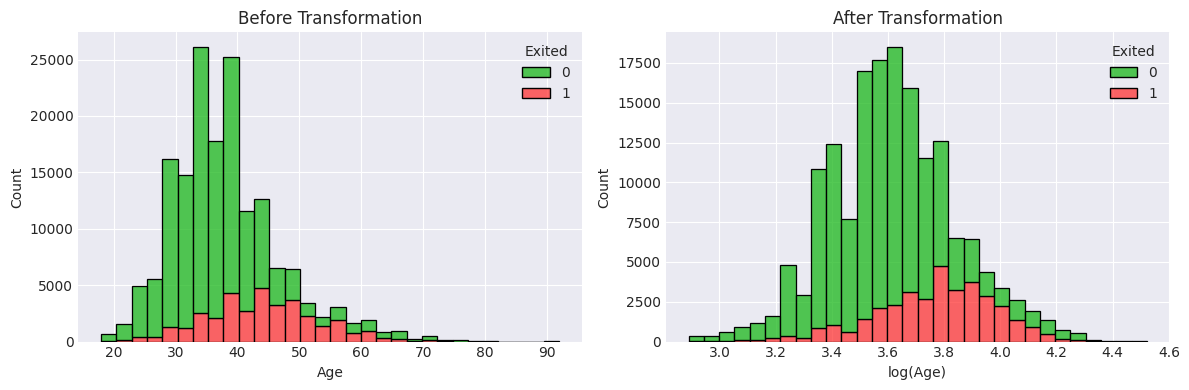

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#Plotting histogram of Age before transformation
sns.histplot(data=dataset, x='Age', bins=30,ax=axs[0], hue='Exited', multiple='stack', palette=['#1bb81b', '#ff3535'])
axs[0].set_title('Before Transformation')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[0].grid(True)

#Plotting histogram of Age after Log transformation
sns.histplot(data=dataset, x='Age_Log', bins=30,ax=axs[1], hue='Exited', multiple='stack', palette=['#1bb81b', '#ff3535'])
axs[1].set_title('After Transformation')
axs[1].set_xlabel('log(Age)')
axs[1].set_ylabel('Count')
axs[1].grid(True)
plt.tight_layout()
plt.show()

**We will now perform a square transformation to the CreditScore feature in order to improve its distribution.**

In [26]:
#Square transformation on CreditScore
dataset['CreditScore_Square'] = np.square(dataset['CreditScore'])

**Let's view the distrubition of CreditScore before and after the transformation.**

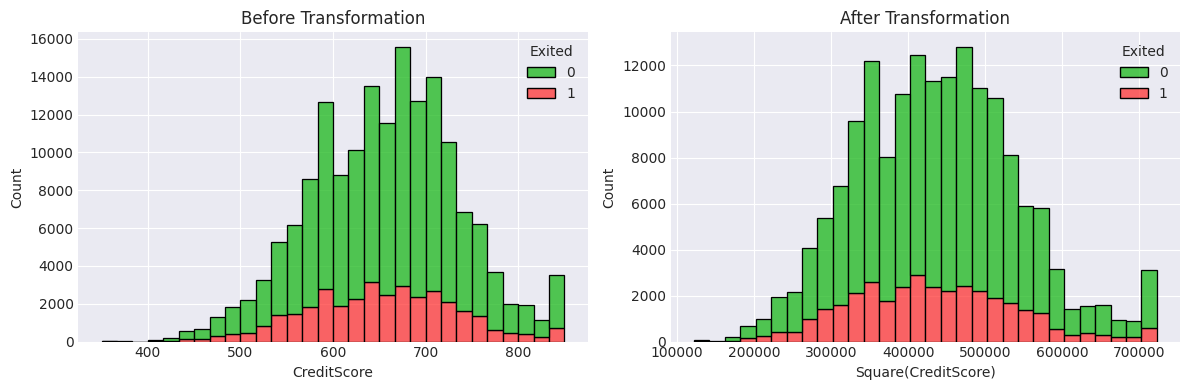

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#Plotting histogram of CreditScore before transformation
sns.histplot(data=dataset, x='CreditScore', bins=30,ax=axs[0], hue='Exited', multiple='stack', palette=['#1bb81b', '#ff3535'])
axs[0].set_title('Before Transformation')
axs[0].set_xlabel('CreditScore')
axs[0].set_ylabel('Count')
axs[0].grid(True)

#Plotting histogram of CreditScore after Square transformation
sns.histplot(data=dataset, x='CreditScore_Square', bins=30,ax=axs[1], hue='Exited', multiple='stack', palette=['#1bb81b', '#ff3535'])
axs[1].set_title('After Transformation')
axs[1].set_xlabel('Square(CreditScore)')
axs[1].set_ylabel('Count')
axs[1].grid(True)
plt.tight_layout()
plt.show()

**We can now replace the original Age and CreditScore features with Age_Log and CreditScore_Square respectively.**

In [28]:
dataset['Age'] = dataset['Age_Log']
dataset['CreditScore'] = dataset['CreditScore_Square']
dataset.drop(columns=['Age_Log','CreditScore_Square'],inplace=True)
dataset.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,446224,France,Male,3.496508,3,0.00,2,1.0,0.0,181449.97,0
1,393129,France,Male,3.496508,1,0.00,2,1.0,1.0,49503.50,0
2,459684,France,Male,3.688879,10,0.00,2,1.0,0.0,184866.69,0
3,337561,France,Male,3.526361,2,148882.54,1,1.0,1.0,84560.88,0
4,512656,Spain,Male,3.496508,5,0.00,2,1.0,1.0,15068.83,0


In [29]:
#We need to standardise the features: CreditScore, Age, Balance, and EstimatedSalary
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset[['CreditScore', 'Age', 'Balance','EstimatedSalary']] = sc.fit_transform(dataset[['CreditScore', 'Age', 'Balance','EstimatedSalary']])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,0.084392,France,Male,-0.530638,3,-0.883163,2,1.0,0.0,1.369486,0
1,-0.420477,France,Male,-0.530638,1,-0.883163,2,1.0,1.0,-1.254085,0
2,0.212380,France,Male,0.327876,10,-0.883163,2,1.0,0.0,1.437422,0
3,-0.948861,France,Male,-0.397411,2,1.486918,1,1.0,1.0,-0.557018,0
4,0.716080,Spain,Male,-0.530638,5,-0.883163,2,1.0,1.0,-1.938770,0


**We now need to encode our categorical features.**

In [30]:
dataset = pd.get_dummies(data=dataset,columns=categoricalFeatures, drop_first=True, dtype='int')

In [31]:
#Let's move the Exited column back to the end
transportedColumn = dataset.pop('Exited')
dataset = pd.concat([dataset,transportedColumn],axis=1)
dataset.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,...,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,Exited
id,,,,,,,,,,,,,,,,,,,,,
0,0.084392,-0.530638,-0.883163,1.369486,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,-0.420477,-0.530638,-0.883163,-1.254085,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,0.212380,0.327876,-0.883163,1.437422,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
3,-0.948861,-0.397411,1.486918,-0.557018,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0.716080,-0.530638,-0.883163,-1.938770,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0


**Since we are going to use a neural network model, we do not have to worry about the VIF scores found earlier. Hence, we won't be dropping any other features.**

In [32]:
#Let's create our X (independant variables) and y (dependant variable)
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

In [33]:
#Splitting datasets into the Training set (80%), and Test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**We will now build our machine learning model which will later use to create predictions on the submission dataset.**

# <u><b>Building and training the model</b></u>

<h2><i><u>ANN (Neural Network)</u></i></h2>

In [34]:
#pip install scikeras

In [35]:
#Import the libraries
import keras
from keras.metrics import AUC
from keras.layers import Dense, PReLU, Dropout
from keras.regularizers import l2
from keras.losses import BinaryCrossentropy
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
#import scikeras
#from scikeras.wrappers import KerasClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from datetime import datetime

**The following hidden code cell takes long to run and hence has been commented out. I have put the output in a markdown cell below.**

In [36]:
'''import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)
def create_model(units_input, units_hidden1, units_hidden2, learning_rate, l2_reg):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(units=units_input, activation=PReLU(), kernel_initializer='he_uniform', input_shape=X_train[0].shape))
    model.add(Dense(units=units_hidden1, activation=PReLU(), kernel_initializer='he_uniform', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(units=units_hidden2, activation=PReLU(), kernel_initializer='he_uniform', kernel_regularizer=l2(l2_reg)))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate), loss=BinaryCrossentropy(from_logits=True), metrics=[AUC(from_logits=True)])
    return model

def objective(trial):
    units_input = trial.suggest_int('units_input', 32, 128)
    units_hidden1 = trial.suggest_int('units_hidden1', 16, 64)
    units_hidden2 = trial.suggest_int('units_hidden2', 4, 16)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    l2_reg = trial.suggest_float('l2_reg', 0.0001, 0.04, log=True)

    #Wrap the Keras model with KerasClassifier
    keras_classifier = KerasClassifier(model=lambda: create_model(units_input, units_hidden1, units_hidden2, learning_rate, l2_reg),
                                       epochs=10, batch_size=64, verbose=0)

    #Use cross_val_score for evaluation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(keras_classifier, X_train, y_train, cv=cv, scoring='roc_auc')

    #Return the average AUC score
    return np.mean(scores)

current_datetime = datetime.now()
print("Current Date and Time:", current_datetime)
# Create a study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

#Get the best hyperparameters
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")
current_datetime = datetime.now()
print("Current Date and Time:", current_datetime)
#took 3 hours and 20mins to run''';

**Best Hyperparameters: {'units_input': 53, 'units_hidden1': 47, 'units_hidden2': 11, 'learning_rate': 0.002275446134822961, 'l2_reg': 0.0013439565940346753}**

In [37]:
#Clear TensorFlow session
tf.keras.backend.clear_session()
#Create ANN
annFinal = keras.models.Sequential()
#Add the input layer
annFinal.add(Dense(units=53, activation=PReLU(),kernel_initializer='he_uniform',input_shape=X_train[0].shape))
annFinal.add(Dense(units=47,activation=PReLU(),kernel_initializer='he_uniform',kernel_regularizer=l2(0.0013439565940346753)))
annFinal.add(Dense(units=11,activation=PReLU(),kernel_initializer='he_uniform',kernel_regularizer=l2(0.0013439565940346753)))
#Add the output layer
annFinal.add(Dense(units=1, activation='linear'));
#Run the model
annFinal.compile(optimizer = Adam(0.002275446134822961), loss = BinaryCrossentropy(from_logits=True), metrics = [AUC(from_logits=True)])
hist = annFinal.fit(X_train, y_train, batch_size = 64, epochs = 10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2063/2063 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - auc: 0.8558 - loss: 0.4192
Epoch 2/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8815 - loss: 0.3377
Epoch 3/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8852 - loss: 0.3300
Epoch 4/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8829 - loss: 0.3314
Epoch 5/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8864 - loss: 0.3281
Epoch 6/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8867 - loss: 0.3244
Epoch 7/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8896 - loss: 0.3214
Epoch 8/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8864 - loss: 0.3246
Epoch 9/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8871 - loss: 0.3243
Epoch 10/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc: 0.8873 - loss: 0.3241


In [38]:
#Prediction on Train set
logits = annFinal(X_train)
y_pred_train = tf.nn.sigmoid(logits)
#Prediction on test set
logits = annFinal(X_test)
y_pred_test = tf.nn.sigmoid(logits)
print("ANN Model's performance on Train, and Test set:")
print("The model's roc_auc on the training set is: " + str(roc_auc_score(y_train,y_pred_train)))
print("The model's roc_auc on the test set is: " + str(roc_auc_score(y_test,y_pred_test)))

ANN Model's performance on Train, and Test set:
The model's roc_auc on the training set is: 0.8888830116007266
The model's roc_auc on the test set is: 0.8874903026473728


**We have a robust model with a good roc_auc score!**

# <u><b>Playground Series S4E1 - Bank Churning competition prediction</b></u>

In [39]:
#import dataset
dataset_test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
#Change index to id
dataset_test = dataset_test.set_index('id')

In [40]:
#Lastly, let's see the distribution of our Exited column.
print(f"Distribution of Exited column: {dataset['Exited'].sum()/dataset.shape[0]*100:.2f}%")

Distribution of Exited column: 21.16%


In [41]:
#prepare dataset_test to be in correct format for our model
#1. Change columns to correct dtype
for colName in dataset_test.columns:
    if colName in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
        next
    else:
        dataset_test[colName] = dataset_test[colName].astype('category')
#2. Drop columns that do not add any insight into whether the client exited the bank
dataset_test.drop(columns=['CustomerId','Surname'],inplace=True)

In [42]:
#Make sure there are no NaNs
dataset_test.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [43]:
#3. Transform Age column
dataset_test['Age'] = np.log(dataset_test['Age'])
dataset_test['CreditScore'] = np.square(dataset_test['CreditScore'])
#4. Standardise the features: CreditScore, Age, Balance, and EstimatedSalary
dataset_test[['CreditScore', 'Age', 'Balance','EstimatedSalary']] = sc.transform(dataset_test[['CreditScore', 'Age', 'Balance','EstimatedSalary']])
#5. Encode categorical features
dataset_test = pd.get_dummies(data=dataset_test,columns=categoricalFeatures, drop_first=True, dtype='int')
dataset_test.head()

,CreditScore,Age,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,...,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0
id,,,,,,,,,,,,,,,,,,,,,
165034,-0.893378,-2.141761,-0.883163,0.962404,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
165035,0.277087,0.951602,-0.883163,-0.795852,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
165036,-0.066684,-0.397411,-0.883163,0.523083,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
165037,0.251147,-0.142325,-0.883163,0.026977,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
165038,1.218600,0.098965,1.047249,0.533997,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
#Let's create our X_sumbission
X_submission = dataset_test.iloc[:,:].values

**We will now use our model to predict whether the clients in X_submission will exit the bank.**

In [45]:
#Prediction on submission set
logits = annFinal(X_submission)
y_pred_submission = tf.nn.sigmoid(logits)

In [46]:
#Get predictions in expected submission file format
y_pred_submission_df = pd.DataFrame(y_pred_submission)
y_pred_submission_df = y_pred_submission_df.set_index(dataset_test.index.to_series())
y_pred_submission_df = y_pred_submission_df.set_axis(['Exited'], axis='columns')
y_pred_submission_df.head()

,Exited
id,
165034,0.011826
165035,0.871446
165036,0.023360
165037,0.244554
165038,0.340526


In [47]:
#Create submission
y_pred_submission_df.to_csv("submission.csv")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#e7f133;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
Thank you for reading through my notebook on Bank Churn Modelling. I hope you enjoyed it and found it interesting☺️. I will also reply to any comments you have on this notebook. Have a good day!🚀
</p>
</div>